In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



Загрзука данных

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


После того как данные загружены в DF, мы можем просмотреть описание дата-сета

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


В дата-сете 506 записей и 14 признаков, все признаки - вещественные (целочисленные и дробные), пропусков нет

Дата-сет качественный, нет необходимости обрабатывать/преобразовывать признаки, работать с пропусками данных и т.д.

Следовательно, можем переходить к анализу смысла каждого признака

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

Исходя из описания, значений и типов данных, можно сделать вывод что целочисленные признаки - категории.

Однозначно определить признаки, которые следует удалить, я не могу
Однако, хочу отметить, что  признаки Age и B кажутся устаревшими. 

Далее проверим признаки на уникальность и отсеим признаки с высокой долей уникальности

сначала пропишем функцию

In [5]:
def remove_unique_columns(data, unique_max_limit):
    data_for_analysis = data.copy()
    X_cols = data_for_analysis.columns[:-1]
    for c in X_cols:
        remove = False
        if (data_for_analysis[c].dtype in [np.int64]):
            unique_percent = data_for_analysis[c].nunique()/data_for_analysis[c].count()
            remove = unique_percent > unique_max_limit
            print(f"{c}: {data_for_analysis[c].nunique()}/{data_for_analysis[c].count()}={unique_percent:.2f} => {'remove' if remove else 'use'}")
            if remove:
                data_for_analysis.drop(c, axis=1, inplace = True)
    return data_for_analysis

создаим новый сет, в котором будут удалены записи с большим количеством уникальных значений (например, более 10%)

In [6]:
unique_max_limit = 0.1
data_for_analysis = remove_unique_columns(data, unique_max_limit)

CHAS: 2/506=0.00 => use
RAD: 9/506=0.02 => use
TAX: 66/506=0.13 => remove


В итоге из признаков исключен 'TAX'

Далее можем присутпать к обучению регрессионной модели

Для этого используем стандартную функцию, значения переменных и признаков не нормируем

In [7]:
def relearn_and_predict(data, X_cols, y_col):
    X = data[X_cols]
    y = data[y_col]
    # создаем регрессию и тренируем ее по всем данным "как есть"
    reg = LinearRegression().fit(X, y)
    print(f'Weights: {reg.coef_}')
    print(f'Bias: {reg.intercept_}')

    # чтобы оценить ошибки прогноза - рассчитываем прогнозы по переменным и сравниаем с целевым значением
    pred_values = reg.predict(data[X_cols])
    print(f'Error: {mean_absolute_error(pred_values, y):.4f}')
    pass

In [8]:
# data_for_analysis.columns

In [9]:
X_cols = data_for_analysis.columns[:-1]
y_col = data_for_analysis.columns[-1]
relearn_and_predict(data_for_analysis, X_cols, y_col)

Weights: [-1.06733924e-01  3.63707061e-02 -6.77782549e-02  3.02923136e+00
 -1.87012125e+01  3.91169024e+00 -6.05404549e-04 -1.48830269e+00
  1.34575654e-01 -9.85128582e-01  9.54643658e-03 -5.22209530e-01]
Bias: 34.62864308227758
Error: 3.3132


В итоге получаем функцию, с ошибкой 3.
Ошибка кажется значительной. Думаю, можно повысить качество модели за счет нормализации данных

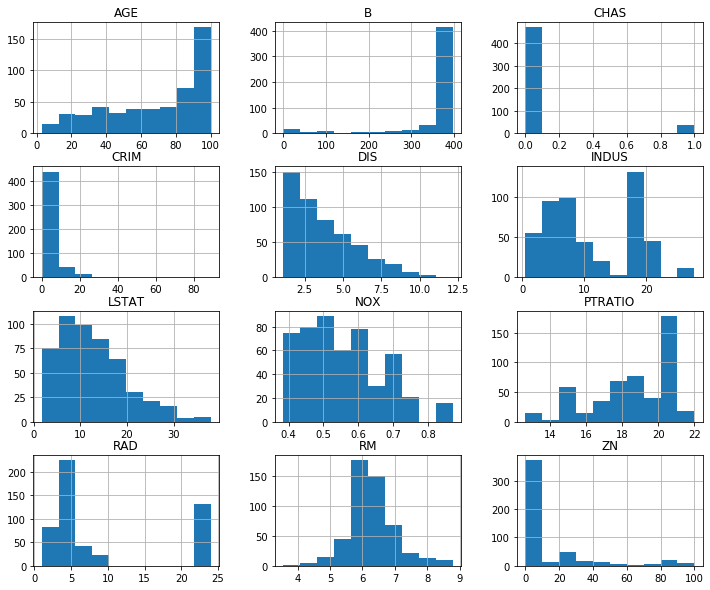

In [10]:
hist = data_for_analysis.hist(column=X_cols,figsize=(12,10))

Показатели, которые можно попробовать заменить на категории:
* CHAS
* RAD

Для простоты - разделим все на 2 категории

In [11]:
data_for_analysis["CHAS_cat"] = data_for_analysis["CHAS"]<0.5
data_for_analysis["RAD_cat"] = data_for_analysis["RAD"]<12.5
# print(data_for_analysis.head())
X_cols_2 = list(data_for_analysis.columns)
for c in ['CHAS', 'RAD', 'MEDV']:
    X_cols_2.remove(c)
# print(X_cols_2)
relearn_and_predict(data_for_analysis, X_cols_2, y_col)

Weights: [-1.02935365e-01  3.45890143e-02 -7.04267278e-02 -1.81167557e+01
  3.94973069e+00 -7.20291492e-04 -1.47578317e+00 -9.79074358e-01
  9.42640749e-03 -5.21845661e-01 -3.07114749e+00 -2.44394726e+00]
Bias: 40.1479944217367
Error: 3.3083


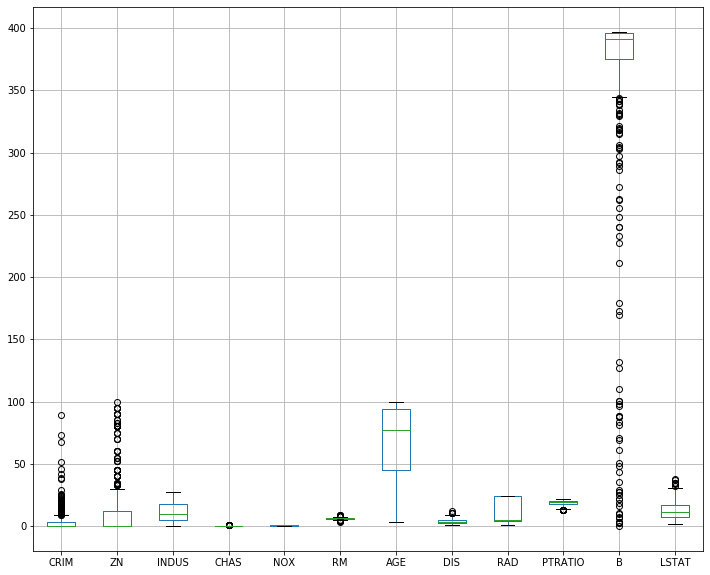

In [12]:
box_p = data_for_analysis[X_cols].boxplot(figsize=(12,10))

Показатели, в которых очень много выбросов:
* B
* CRIM
* ZN

Попробуем их исключить

In [13]:
X_cols_3 = X_cols_2.copy()
for c in ['CRIM', 'ZN', 'B']:
    X_cols_3.remove(c)
# print(X_cols_3)
relearn_and_predict(data_for_analysis, X_cols_3, y_col)

Weights: [-7.16541865e-02 -1.88773094e+01  3.94483034e+00 -1.31899744e-03
 -1.22123204e+00 -1.04636447e+00 -5.73012587e-01 -3.35117760e+00
 -1.08282797e+00]
Bias: 44.216521809235424
Error: 3.4696


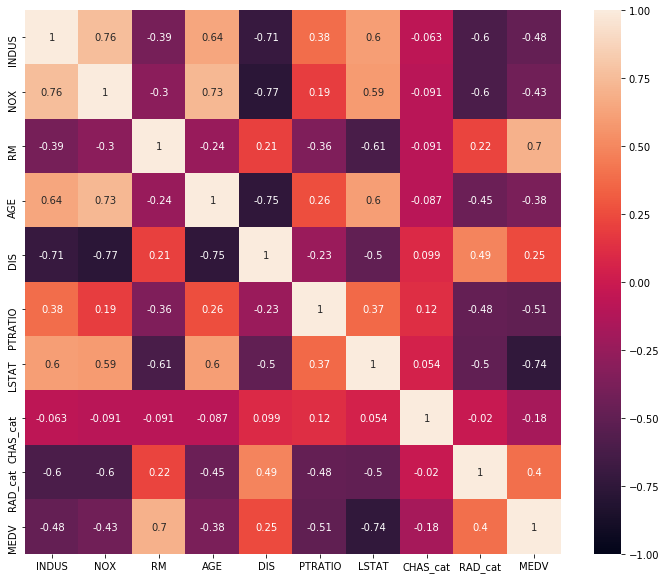

In [14]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data_for_analysis[X_cols_3+['MEDV']].corr(), annot=True, vmin=-1)

Удаляем факторы, которые мало коррелируют с целевой функцией (меньше 0.3):
'DIS', 'CHAS_cat', 'AGE'

Также можно исключить показатели, с высокой зависимостью между собой:
'NOX', 'INDUS', 'RAD_cat'

Можно попробовать исключить DIS

In [ ]:
X_cols_4 = X_cols_3.copy()
for c in ['DIS', 'CHAS_cat', 'AGE', 'NOX', 'INDUS', 'RAD_cat']:
    X_cols_4.remove(c)
# print(X_cols_4)
relearn_and_predict(data_for_analysis, X_cols_4, y_col)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data_for_analysis[X_cols_4].corr(), annot=True, vmin=-1)

Weights: [ 4.51542094 -0.93072256 -0.57180569]
Bias: 18.567111505395232
Error: 3.6418


Если отбор показателей не производить (с уровнем уникаольности 10%), то качество модели будет незначительно лучше.

In [ ]:
unique_max_limit = 1
data_for_analysis = remove_unique_columns(data, unique_max_limit)
X_cols = data_for_analysis.columns[:-1]
y_col = ['MEDV']
relearn_and_predict(data_for_analysis, X_cols, y_col)